Wie unterscheiden sich die Bewertungen der Kandidaten und die der Bols?

In [1]:
# Laden einiger Bibliotheken
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Grafik style
sns.set_style("whitegrid")

In [2]:
# lade den Datensatz
df = pd.read_csv("../data/bewertungen.csv", parse_dates=["Datum"], dayfirst=True)

# füge eine Spalte mit der Bolwertung hinzu
df["Bolwertung"] = round(df[["M", "A", "C"]].mean(axis=1) * 4)

df.tail(10)

,WochenID,FolgenID,Datum,Ort,K1,K2,K3,K4,K5,Summe,M,A,C,Person,Bemerkung,YT-Link,Bolwertung
34,8,1976,2013-12-02,Berlin,NaN,7.0,8.0,7.0,8.0,30,8.0,7.0,7.0,Katharina,U30,https://www.youtube.com/watch?v=SN1KuiYpFik,29.0
35,8,1977,2013-12-03,Berlin,6.0,NaN,7.0,7.0,7.0,27,7.0,8.0,7.0,Nydal,U30,https://www.youtube.com/watch?v=SN1KuiYpFik,29.0
36,8,1978,2013-12-04,Berlin,7.0,7.0,NaN,8.0,8.0,30,7.0,8.0,8.0,Claudia,U30,https://www.youtube.com/watch?v=SN1KuiYpFik,31.0
37,8,1979,2013-12-05,Berlin,8.0,6.0,9.0,NaN,9.0,32,4.0,3.0,3.0,Lukas,"U30, 8h-Dinner",https://www.youtube.com/watch?v=SN1KuiYpFik,13.0
38,8,1980,2013-12-06,Berlin,7.0,5.0,8.0,6.0,NaN,26,8.0,8.0,7.0,Cissy,U30,https://www.youtube.com/watch?v=SN1KuiYpFik,31.0
39,9,1379,2011-07-25,Paris,NaN,6.0,6.0,6.0,7.0,25,6.0,6.0,6.0,Lea,Paris,NaN,24.0
40,9,1380,2011-07-26,Paris,7.0,NaN,7.0,8.0,9.0,31,6.0,6.0,6.0,Oliver,Paris,NaN,24.0
41,9,1381,2011-07-27,Paris,6.0,7.0,NaN,7.0,8.0,28,6.0,6.0,7.0,Raimund,Paris,NaN,25.0
42,9,1382,2011-07-28,Paris,8.0,7.0,8.0,NaN,9.0,32,9.0,10.0,9.0,Jakob,Paris,NaN,37.0
43,9,1383,2011-07-29,Paris,6.0,6.0,7.0,7.0,NaN,26,7.0,6.0,6.0,Tanja,Paris,NaN,25.0


In [3]:
def plot_ddd_vs_dpd(data, axis_min=None, axis_range=(10, 40)):
    # WochenID der letzten Woche
    last_week = data["WochenID"].max()

    # colors = ["0.4" for _ in range(len(df) - 6)] + ["r" for _ in range(5)]

    # scatterplot
    g = sns.scatterplot(
        data=df,
        x="Summe",
        y="Bolwertung",
        hue=data["WochenID"] == last_week,
        # hue="WochenID",
        palette=sns.color_palette(n_colors=2),
    )

    # title
    g.set_title("Wertung Kandidaten vs Bols")

    # achsen
    g.set_xlim(axis_range)
    g.set_ylim(axis_range)
    g.set_aspect("equal", adjustable="box")
    g.set_xlabel("Kandidaten")
    g.set_ylabel("Bols")

    # füge diagonale linie hinzu
    linespace = np.linspace(*axis_range)
    sns.lineplot(x=linespace, y=linespace, color="grey", alpha=0.5)

    # legende
    g.legend(title="Woche")

    # highlighte wichtige datenpunkte
    for index, row in df.iterrows():
        # perfektes dinner
        if row["Summe"] >= 35 and row["Bolwertung"] >= 35:
            g.annotate(
                row["Person"],
                (row["Summe"], row["Bolwertung"]),
                size=8,
                color="g",
            )

        # katastrophen dinner
        if row["Summe"] <= 15 or row["Bolwertung"] <= 15:
            g.annotate(
                row["Person"],
                (row["Summe"], row["Bolwertung"]),
                size=8,
                color="r",
            )

        # aktuelle woche
        elif row["WochenID"] == last_week:
            g.annotate(row["Person"], (row["Summe"], row["Bolwertung"]), size=8)

    return g


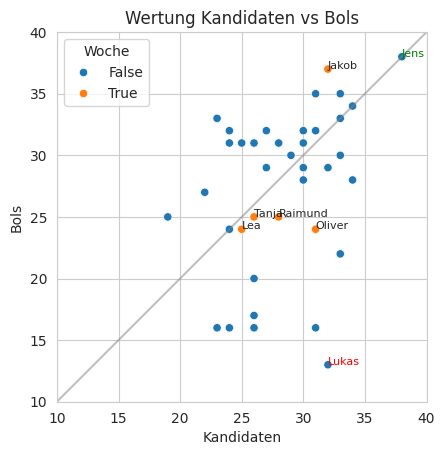

In [4]:
plot = plot_ddd_vs_dpd(df)

#plot.get_figure().savefig("out.png", dpi=200)